In [11]:
#kohonen
from minisom import MiniSom
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.datasets import load_wine

In [12]:
data= load_wine()
x= data.data
y=data.target
xScaled = (x-x.min())/ ( x.max()-x.min())

Text(0.5, 1.0, 'Label')

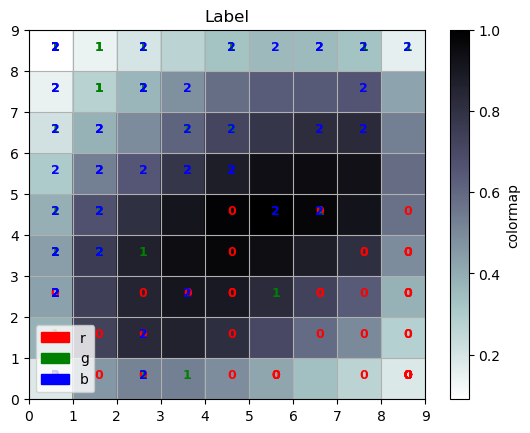

In [16]:
model = MiniSom(x=9, y=9, sigma=9, learning_rate=0.1, input_len=13)
model.random_weights_init(xScaled)
model.train_random(xScaled, 2000)

colors =["r","g","b"]
labels=[colors[i] for i in y]
plt.pcolor(model.distance_map().T, cmap="bone_r")
plt.colorbar(label="colormap")
for i, x in enumerate(xScaled):
    winner = model.winner(x)
    plt.text(winner[0]+0.5, winner[1]+0.5, str(y[i]), color=labels[i], fontdict={"weight":"bold", "size":9})
legend = [Patch(color=c, label=c) for c in colors]
plt.legend(handles=legend)
plt.grid()
plt.title("Label")

In [21]:
import random
import numpy as np

inputVecs =[]
for i in range(4):
    temp=[]
    for j in range(4):
        temp.append(random.randint(0,1))
    inputVecs.append(temp)

weights=[]
for i in range(10):
    temp=[]
    for j in range(4):
        temp.append(random.random()*10)
    weights.append(temp)

weights=np.array(weights)
inputVecs=np.array(inputVecs)

        

In [22]:
for i in range(len(inputVecs)):
    distances=[]
    for j in range(len(weights)):
        distances.append(sum((inputVecs[i]-weights[j])**2))
    winner= min(distances)
    winIdx = distances.index(winner)
    weights[winIdx] += inputVecs[i]-weights[winIdx]
weights

array([[0.        , 0.        , 0.        , 1.        ],
       [8.48582993, 3.8049153 , 2.24109749, 4.49551631],
       [9.30465553, 2.84360363, 3.83881804, 1.07023189],
       [8.80846235, 0.17868528, 9.89210264, 8.57968682],
       [8.62226098, 7.51374303, 4.9786694 , 0.03219823],
       [1.54788528, 9.86923657, 4.45876126, 3.87141462],
       [5.66034864, 6.56721247, 8.90596871, 6.04914105],
       [9.74668992, 0.67217559, 3.83544298, 6.94243974],
       [6.84548611, 0.07356788, 3.90453551, 4.24378968],
       [4.83653929, 3.27466426, 1.65178741, 6.00871047]])

# Practical 4 and 6

In [54]:
import numpy as np

In [55]:
inputVecs

array([[0, 1, 0, 1],
       [0, 1, 1, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 1]])

In [56]:
exemplars =np.array([[-1,-1,-1,-1],[1,1,1,1],[1,-1,1,-1]])
weights = exemplars//2
bias = len(inputVecs)//2

In [57]:
activations = np.dot(inputVecs, weights.T)+bias
activations

array([[ 0,  2,  0],
       [-1,  2,  0],
       [ 0,  2,  0],
       [ 1,  2,  1]])

In [58]:
def nonZeroCount(vec):
    cnt=0
    for i in vec:
        if i!=0:
            cnt+=1
    return cnt
        

for i in range(len(activations)):
    while(nonZeroCount(activations[i])>1):
    #while(min(activations[i])>0):
        print(activations[i])
        for j in range(activations.shape[1]):
            print(activations[i][j])
            val = 0.6 * sum([activations[i][k] for k in range(activations.shape[1]) if k!=j])
            act = activations[i][j] - val
            if(act<0):
                act=0
            activations[i][j]=act
        print()
activations
   

[-1  2  0]
-1
2
0

[1 2 1]
1
2
1



array([[0, 2, 0],
       [0, 2, 0],
       [0, 2, 0],
       [0, 1, 0]])

In [59]:
# practical 5 BAM
inputVecs=np.array([[1,1], [-1,-1], [1,-1],[-1,1]])
outputVecs=np.array([[1,1,1],[-1,-1,-1], [1,-1,1], [-1,1,1]])

In [63]:
weights =np.zeros((inputVecs.shape[1], outputVecs.shape[1]))
for i in range(len(inputVecs)):
    weights+=np.outer(inputVecs[i], outputVecs[i])


In [65]:
for ipv in inputVecs:
    yPred = np.sign(np.dot(ipv, weights))
    xPred = np.sign(np.dot(yPred, weights.T))
    print("Recalled memory", xPred)

Recalled memory [1. 1.]
Recalled memory [-1. -1.]
Recalled memory [ 1. -1.]
Recalled memory [-1.  1.]
